In [90]:
# Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
players_2009_2021 = pd.read_csv("CollegeBasketballPlayers2009-2021.csv", low_memory=False)
players_2022 = pd.read_csv("CollegeBasketballPlayers2022.csv")
drafted_players = pd.read_excel("DraftedPlayers2009-2021.xlsx")
latest_raptor = pd.read_csv("latest_RAPTOR_by_player.csv")
modern_raptor = pd.read_csv("modern_RAPTOR_by_player.csv")

In [93]:
# Displaying the first five rows of each dataset
print(players2009_2021)
print(players2022)
print(drafted_players)
print(latest_raptor)
print(modern_raptor)

              player_name              team  conf  GP  Min_per   Ortg   usg  \
0           DeAndrae Ross     South Alabama    SB  26     29.5   97.3  16.6   
1           Pooh Williams          Utah St.   WAC  34     60.9  108.3  14.9   
2           Jesus Verdejo     South Florida    BE  27     72.0   96.2  21.8   
3         Mike Hornbuckle        Pepperdine   WCC  30     44.5   97.7  16.0   
4           Anthony Brown           Pacific    BW  33     56.2   96.5  22.0   
...                   ...               ...   ...  ..      ...    ...   ...   
61056      Trey Patterson         Villanova    BE   2      0.3   60.5  19.3   
61057  Stavros Polatoglou  Northwestern St.  Slnd   4      1.3   28.3   7.1   
61058          Sandy Ryan            Tulane  Amer   1      0.1    0.0   0.0   
61059           Ty Larson        Texas Tech   B12   1      0.1    0.0   0.0   
61060         Jaden Jones           Rutgers   B10   4      1.0   89.6  28.8   

        eFG  TS_per  ORB_per  ...      dgbpm    ore

In [100]:
df = players2009_2021.rename(columns={'Unnamed: 64': 'position'}, inplace=True)
print(players2009_2021)

              player_name              team  conf  GP  Min_per   Ortg   usg  \
0           DeAndrae Ross     South Alabama    SB  26     29.5   97.3  16.6   
1           Pooh Williams          Utah St.   WAC  34     60.9  108.3  14.9   
2           Jesus Verdejo     South Florida    BE  27     72.0   96.2  21.8   
3         Mike Hornbuckle        Pepperdine   WCC  30     44.5   97.7  16.0   
4           Anthony Brown           Pacific    BW  33     56.2   96.5  22.0   
...                   ...               ...   ...  ..      ...    ...   ...   
61056      Trey Patterson         Villanova    BE   2      0.3   60.5  19.3   
61057  Stavros Polatoglou  Northwestern St.  Slnd   4      1.3   28.3   7.1   
61058          Sandy Ryan            Tulane  Amer   1      0.1    0.0   0.0   
61059           Ty Larson        Texas Tech   B12   1      0.1    0.0   0.0   
61060         Jaden Jones           Rutgers   B10   4      1.0   89.6  28.8   

        eFG  TS_per  ORB_per  ...      dgbpm    ore

In [101]:
# Data merge
merged_data = pd.merge(players_2022, drafted_players, "left", left_on="player_name", right_index=True)
print(merged_data.head())

KeyError: 'player_name'

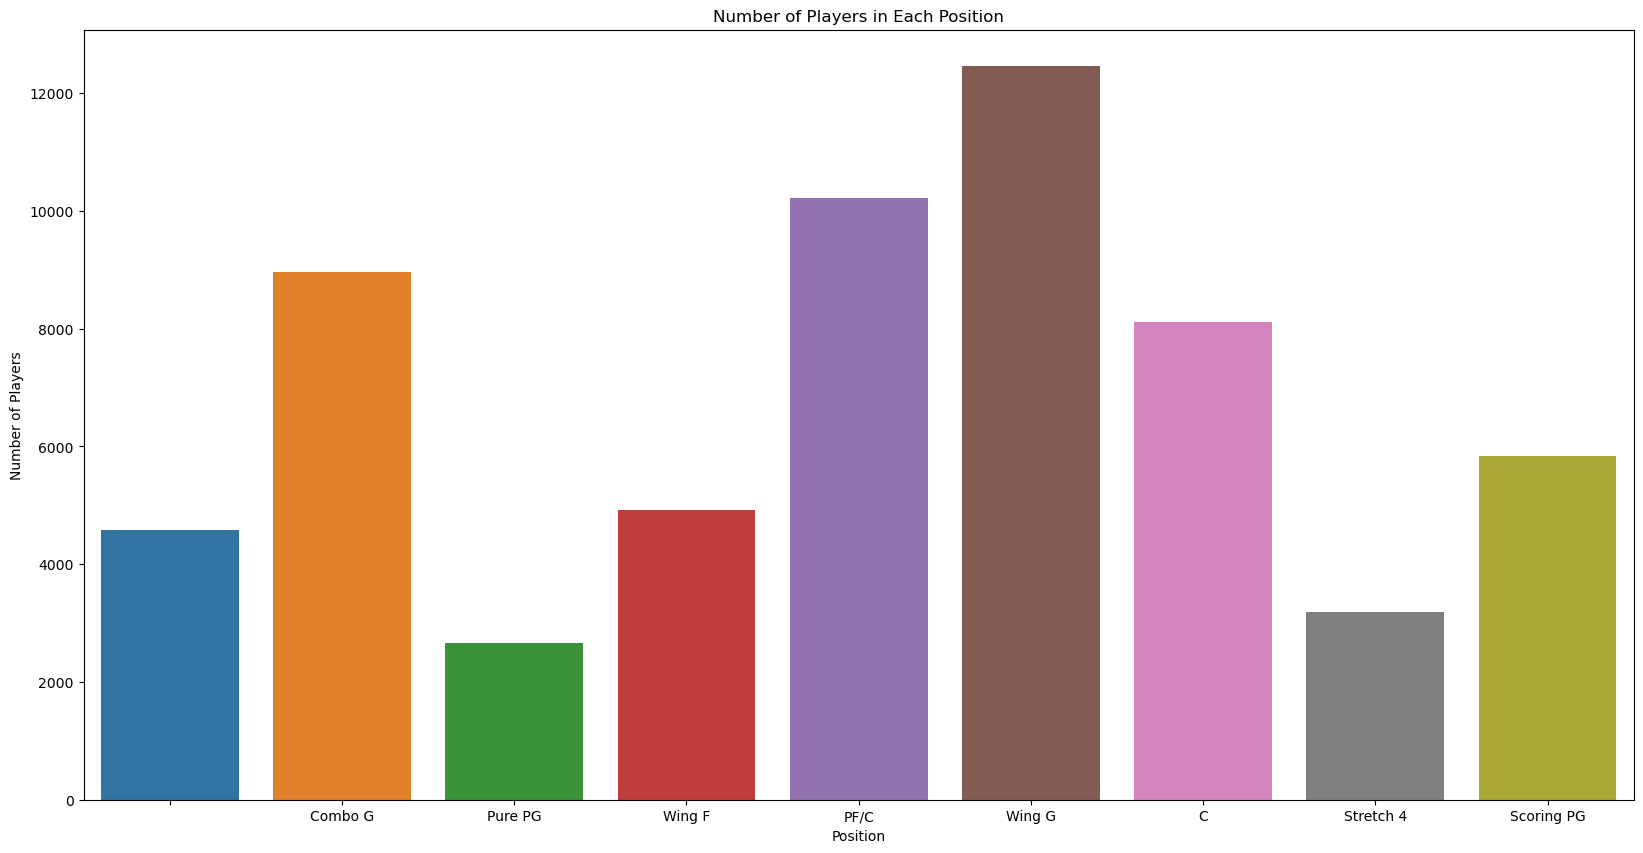

In [105]:
# Bar chart of the number of players in each position
plt.figure(figsize=(20,10))
sns.countplot(data=players_2009_2021, x="position")
plt.title("Number of Players in Each Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.show()
#the blue " " bar is all of the players in the dataset without a position (positionless players)

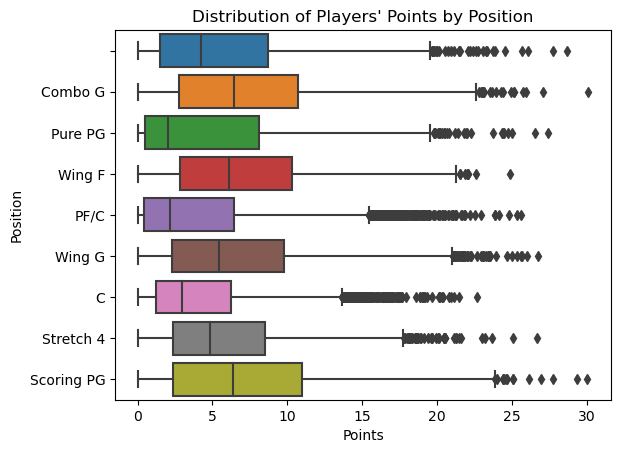

In [107]:
# Boxplot of the distribution of players' points
sns.boxplot(data=players_2009_2021, x="pts", y="position")
plt.title("Distribution of Players' Points by Position")
plt.xlabel("Points")
plt.ylabel("Position")
plt.show()

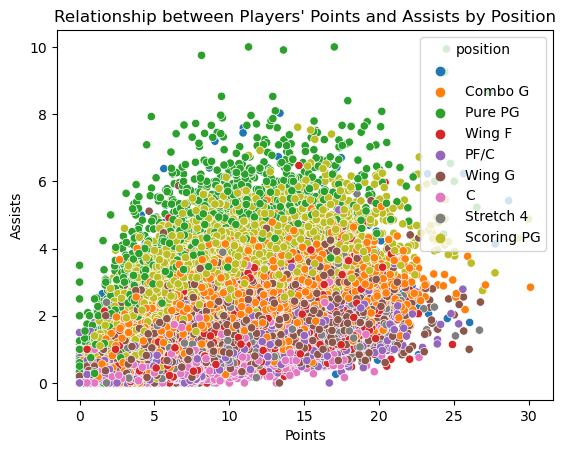

In [111]:
# Scatter plot of players' points and assists
sns.scatterplot(data=players_2009_2021, x="pts", y="ast", hue="position")
plt.title("Relationship between Players' Points and Assists by Position")
plt.xlabel("Points")
plt.ylabel("Assists")
plt.show()

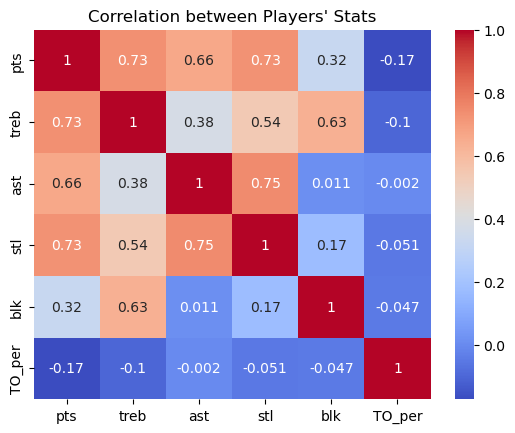

In [113]:
# Heatmap of correlation between players' stats
corr = players_2009_2021[["pts", "treb", "ast", "stl", "blk", "TO_per"]].corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation between Players' Stats")
plt.show()


In [ ]:
# Data merge
merged_data = pd.merge(players_2009_2021, drafted_players, on="player_id", how="left")
print(merged_data.head())

In [114]:
# Groupby aggregations
agg_data_1 = players_2009_2021.groupby("position")["pts"].agg(["mean", "median", "std"])
print(agg_data_1)

agg_data_2 = players_2009_2021.groupby("school_name")["height_cm"].mean().sort_values(ascending=False)[:10]
print(agg_data_2)



                mean  median       std
position                              
            5.569997  4.2581  4.909751
C           4.213542  2.9412  3.845334
Combo G     7.135415  6.4629  5.123970
PF/C        4.008350  2.1579  4.549201
Pure PG     4.711163  2.0000  5.339897
Scoring PG  7.152638  6.3914  5.415017
Stretch 4   5.877960  4.8438  4.392560
Wing F      6.902677  6.1200  4.750850
Wing G      6.466977  5.4333  4.909415


KeyError: 'school_name'

In [116]:
# Machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data
X = players_2009_2021[["treb", "ast", "stl", "blk", "TO_per"]]
y = players_2009_2021["pts"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set and calculate the R-squared score
y_pred = model

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the datasets

drafted_players = pd.read_excel('DraftedPlayers2009-2021.xlsx')
latest_raptor = pd.read_csv('latest_RAPTOR_by_player.csv')
modern_raptor = pd.read_csv('modern_RAPTOR_by_player.csv')
players2009_2021 = pd.read_csv('CollegeBasketballPlayers2009-2021.csv', low_memory=False)
players2022 = pd.read_csv('CollegeBasketballPlayers2022.csv', low_memory=False)

In [109]:
# Displaying the first five rows of each dataset
print(players2009_2021.head())
print(players2022.head())
print(drafted_players.head())
print(latest_raptor.head())
print(modern_raptor.head())

# Displaying information about each dataset
print(players2009_2021.info())
print(players2022.info())
print(drafted_players.info())
print(latest_raptor.info())
print(modern_raptor.info())


       player_name           team conf  GP  Min_per   Ortg   usg   eFG  \
0    DeAndrae Ross  South Alabama   SB  26     29.5   97.3  16.6  42.5   
1    Pooh Williams       Utah St.  WAC  34     60.9  108.3  14.9  52.4   
2    Jesus Verdejo  South Florida   BE  27     72.0   96.2  21.8  45.7   
3  Mike Hornbuckle     Pepperdine  WCC  30     44.5   97.7  16.0  53.6   
4    Anthony Brown        Pacific   BW  33     56.2   96.5  22.0  52.8   

   TS_per  ORB_per  ...     dgbpm    oreb    dreb    treb     ast     stl  \
0   44.43      1.6  ... -1.941150  0.1923  0.6154  0.8077  1.1923  0.3462   
1   54.48      3.8  ... -0.247934  0.6765  1.2647  1.9412  1.8235  0.4118   
2   47.98      2.1  ... -0.883163  0.6296  2.3333  2.9630  1.9630  0.4815   
3   53.69      4.1  ... -0.393459  0.7000  1.4333  2.1333  1.1000  0.5667   
4   54.31      8.3  ... -0.668318  1.4242  3.3030  4.7273  0.8485  0.4545   

      blk      pts  position  Unnamed: 65  
0  0.0385   3.8846       NaN      6.22026  
1  0

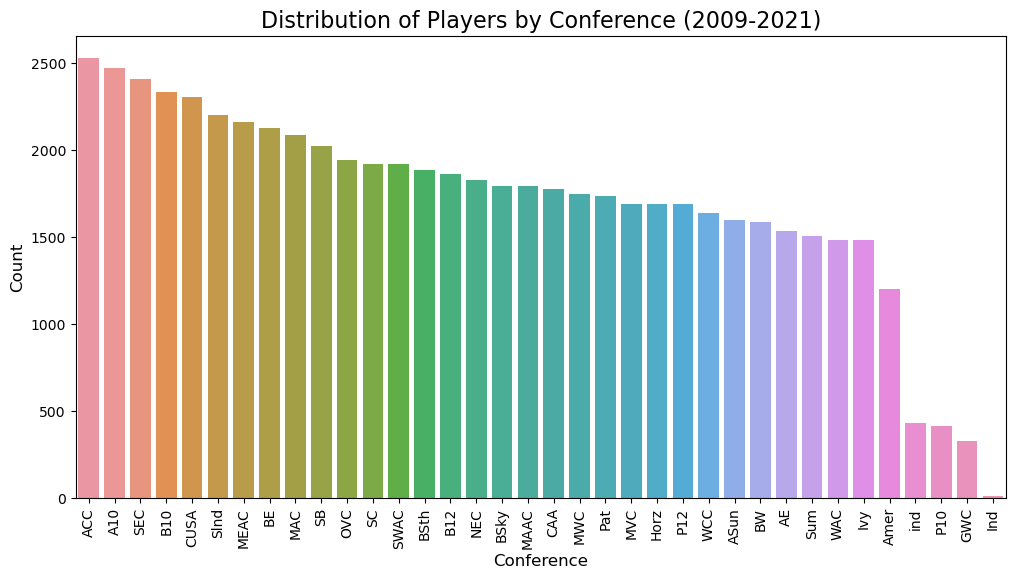

In [14]:
# Creating a bar chart of players by conference
plt.figure(figsize=(12, 6))
sns.countplot(x='conf', data=players2009_2021, order=players2009_2021['conf'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Players by Conference (2009-2021)', fontsize=16)
plt.xlabel('Conference', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [15]:
# Creating a histogram of player heights
plt.figure(figsize=(12, 6))
sns.histplot(x='height', data=players2009_2021, bins=15)
plt.title('Distribution of Player Heights (2009-2021)', fontsize=16)
plt.xlabel('Height (inches)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


ValueError: Could not interpret value `height` for parameter `x`

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Visualize the data

# Distribution of players' heights
sns.histplot(data=players_2009_2021, x="height_cm", kde=True)
plt.title("Distribution of Players' Heights")
plt.xlabel("Height (cm)")
plt.show()

# Distribution of players' weights
sns.histplot(data=players_2009_2021, x="weight_kg", kde=True)
plt.title("Distribution of Players' Weights")
plt.xlabel("Weight (kg)")
plt.show()

# Bar chart of the number of players in each position
sns.countplot(data=players_2009_2021, x="position")
plt.title("Number of Players in Each Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.show()

# Boxplot of the distribution of players' points
sns.boxplot(data=players_2009_2021, x="points", y="position")
plt.title("Distribution of Players' Points by Position")
plt.xlabel("Points")
plt.ylabel("Position")
plt.show()

# Scatter plot of players' points and assists
sns.scatterplot(data=players_2009_2021, x="points", y="assists", hue="position")
plt.title("Relationship between Players' Points and Assists by Position")
plt.xlabel("Points")
plt.ylabel("Assists")
plt.show()

# Heatmap of correlation between players' stats
corr = players_2009_2021[["points", "rebounds", "assists", "steals", "blocks", "turnovers", "fouls"]].corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation between Players' Stats")
plt.show()

# Data merge
merged_data = pd.merge(players_2009_2021, drafted_players, on="player_id", how="left")
print(merged_data.head())

# Groupby aggregations
agg_data_1 = players_2009_2021.groupby("position")["points"].agg(["mean", "median", "std"])
print(agg_data_1)

agg_data_2 = players_2009_2021.groupby("school_name")["height_cm"].mean().sort_values(ascending=False)[:10]
print(agg_data_2)

# Machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data
X = players_2009_2021[["rebounds", "assists", "steals", "blocks", "turnovers", "fouls"]]
y = players_2009_2021["points"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set and calculate the R-squared score
y_pred = model
